In [1]:
# # opening file from kaggle using api token
# !pip install -q kaggle
# from google.colab import files
# files.upload()


In [2]:
# !mkdir ~/.kaggle

In [3]:
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

In [4]:
# !kaggle datasets download -d hafsatauil/human-eyes-openclose-tipe

In [5]:
# !unzip /content/human-eyes-openclose-tipe.zip

In [6]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 1.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.

In [8]:
from ultralytics import YOLO

model = YOLO('/content/best.pt')  # Load your trained model


In [9]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="qhEQPF2arLOcjgToiugC")
project = rf.workspace("choyoooo").project("drowsiness-detection-uezwr")
version = project.version(5)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.0 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.82, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Drowsiness-Detection-5 in yolov8:: 100%|██████████| 20012/20012 [00:03<00:00, 6174.14it/s]


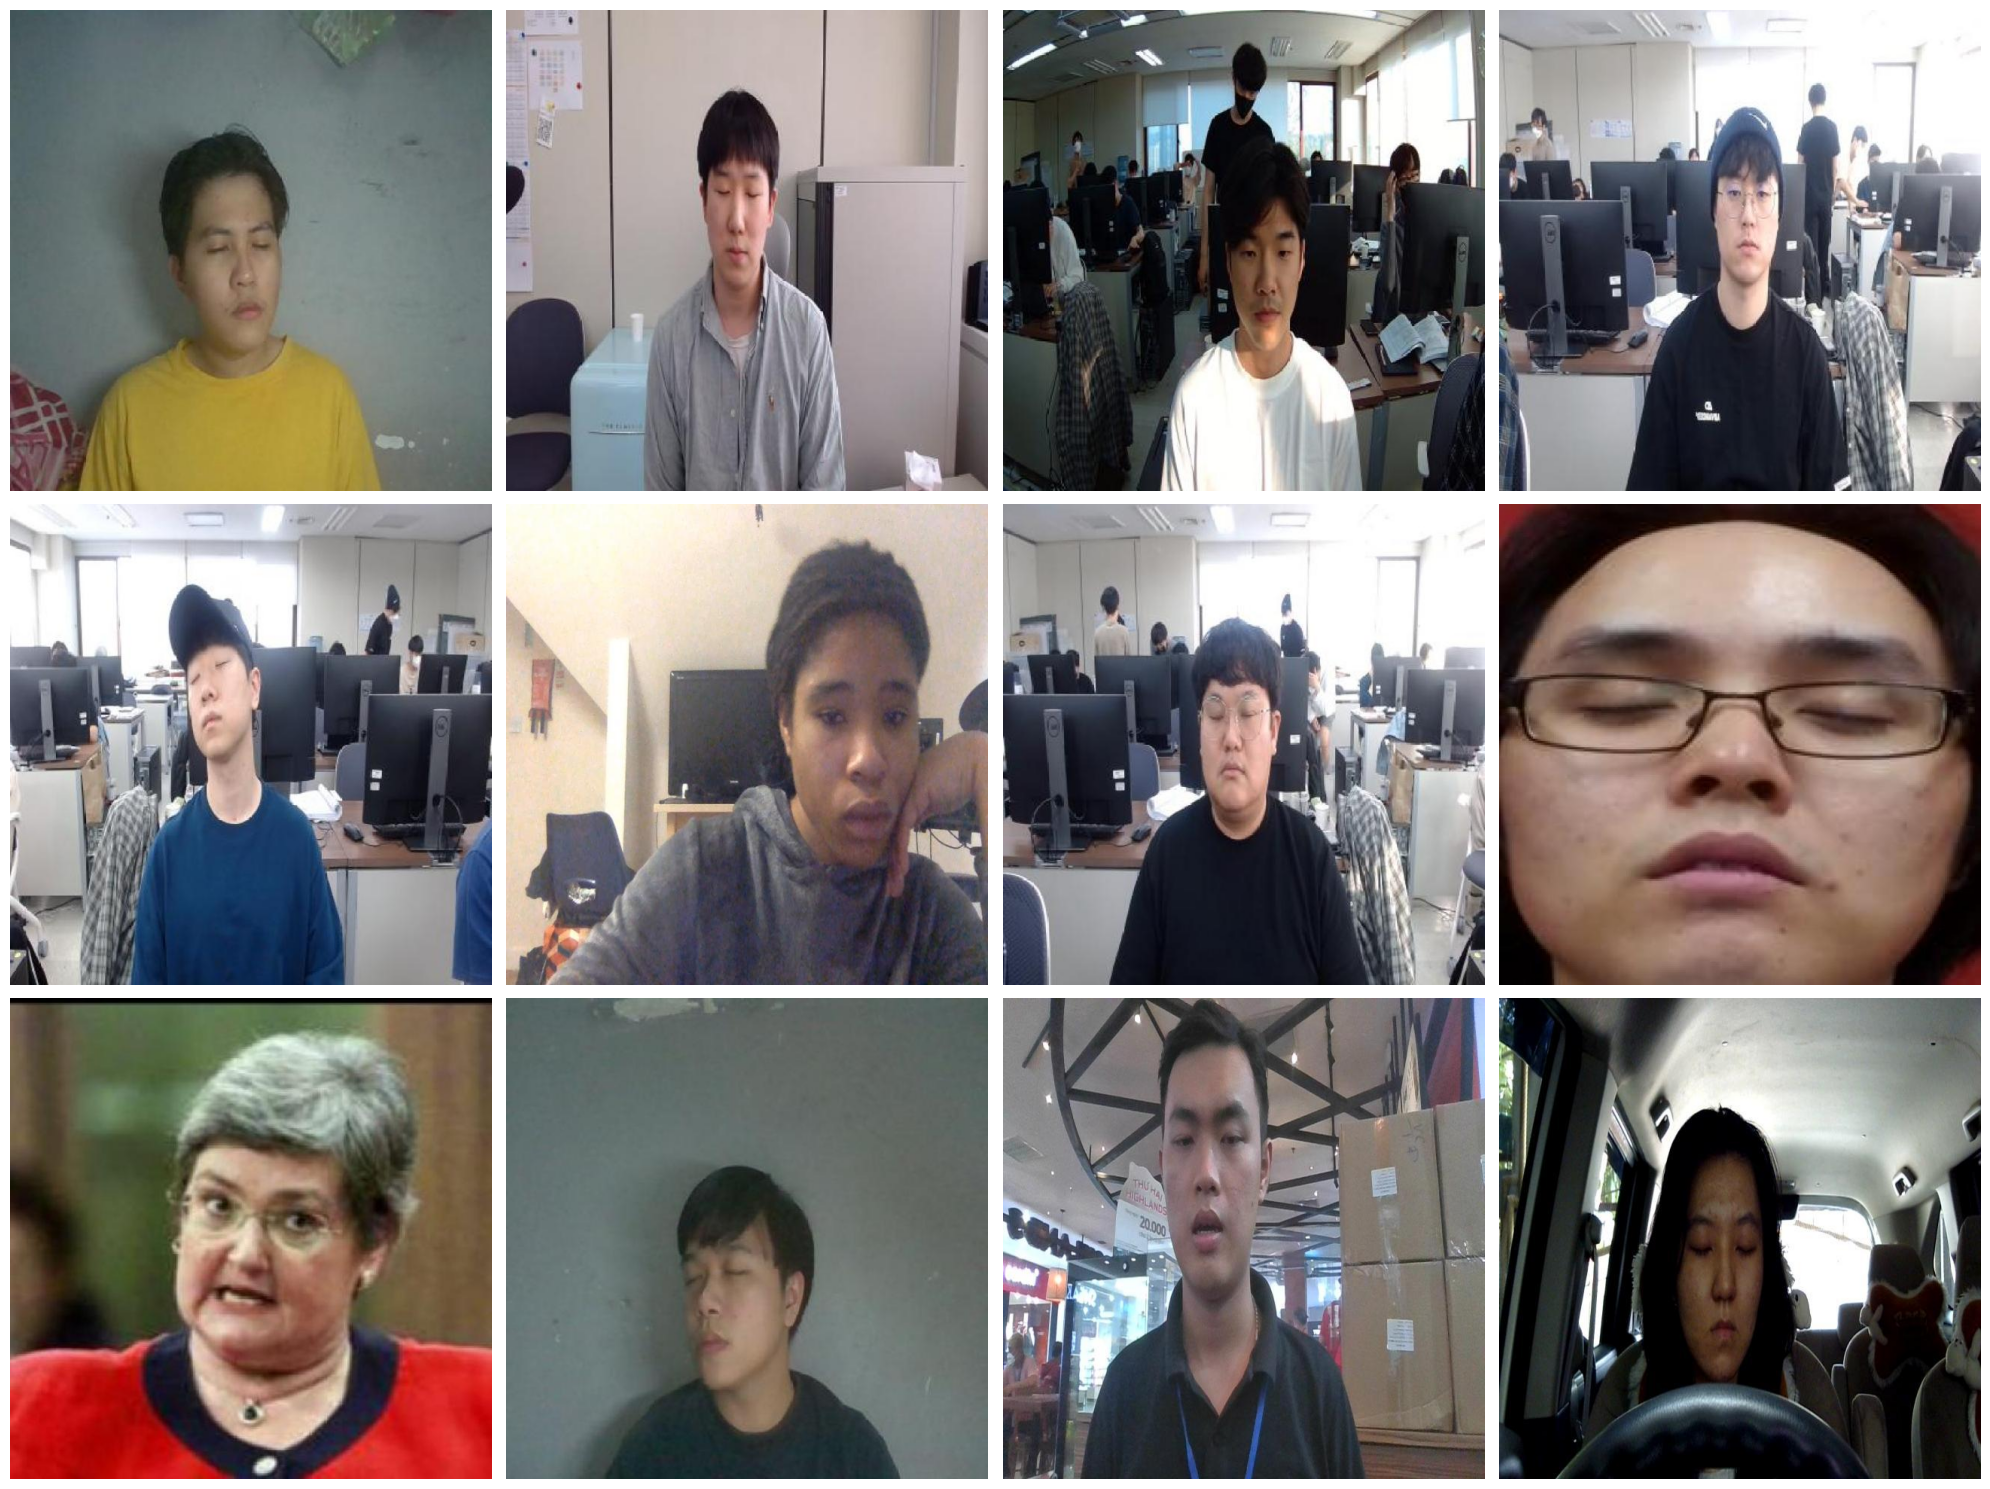

In [10]:
import glob
from PIL import Image
import matplotlib.pyplot as plt

# Get a list of image paths
image_paths = glob.glob('/content/Drowsiness-Detection-5/train/images/*.jpg')[24:36]

# Create a figure with subplots
fig, axes = plt.subplots(3, 4, figsize=(20, 15))

# Iterate over the image paths and display images in subplots
for i, image_path in enumerate(image_paths):
    # Calculate the row and column indices of the current subplot
    row = i // 4
    col = i % 4

    # Open the image using PIL
    img = Image.open(image_path)

    # Display the image in the current subplot
    axes[row, col].imshow(img)
    axes[row, col].axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [11]:
import yaml

# Read the contents of the data.yaml file
with open('/content/Drowsiness-Detection-5/data.yaml', 'r') as file:
    data = yaml.safe_load(file)

# Update the paths in the test, train, and val sections
data['test'] = '/content/Drowsiness-Detection-5/test/images'
data['train'] = '/content/Drowsiness-Detection-5/train/images'
data['val'] = '/content/Drowsiness-Detection-5/valid/images'

# Write the modified data back to the data.yaml file
with open('/content/Drowsiness-Detection-5/data.yaml', 'w') as file:
    yaml.dump(data, file)

In [12]:
!yolo task=detect mode=train model=best.pt data={dataset.location}/data.yaml epochs=15 imgsz=640 plots=True


Ultralytics YOLOv8.2.82 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=best.pt, data=/content/Drowsiness-Detection-5/data.yaml, epochs=15, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf

In [13]:
!yolo task=detect mode=val model=best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.2.82 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,846,129 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/Drowsiness-Detection-5/valid/labels.cache... 1308 images, 0 backgrounds, 0 corrupt: 100% 1308/1308 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 168, len(boxes) = 1309. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 82/82 [00:36<00:00,  2.26it/s]
                   all       1308       1309     0.0204    0.00379     0.0103     0.0054
                 awake        780        781          0          0          0          0
               calling        528        528     0.0408    0.00758     0.0206     0.0108
Speed: 0.4ms preprocess, 

In [15]:
!yolo task=detect mode=save model=Jetson.pt


Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 769, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=save'. Valid modes are {'track', 'predict', 'train', 'benchmark', 'val', 'export'}.

    Arguments received: ['yolo', 'task=detect', 'mode=save', 'model=Jetson.pt']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of {'classify', 'segment', 'obb', 'detect', 'pose'}
                MODE (required) is one of {'track', 'predict', 'train', 'benchmark', 'val', 'export'}
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at https://docs.ultralytics.com/usage/cfg or with 'yolo cfg'

    1. Train a de